In [1]:
import os

from tumorsphere.core.simulation import Simulation

In [2]:
sim = Simulation(
    prob_stem=[0.7],
    prob_diff=[0],
    prob_supervivence_radiotherapy=[0.6],
    num_of_realizations=2,
    num_of_steps_per_realization=28,
)

In [3]:
filename = "radiotherapy.dat"

# if the file does not exist, we create it and write the header
if not os.path.exists(filename):
    with open(filename, "w") as datfile:
        datfile.write(
            "prob_supervivence_radiotherapy "
            "prob_diff "
            "prob_stem "
            "rng_seed "
            "final_simulation_time "
            "num_cells "
            "killed_cells "
            "num_active "
            "killed_active "
            "total_stem "
            "killed_stem "
            "active_stem "
            "killed_active_stem\n"
        )

In [4]:
sim.simulate_parallel(
    sql=False,
    output_dir="simple_radiotherapy",
)

# Analysis

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import numpy as np

# Default color cycle
default_colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]

In [4]:
df_1 = pd.read_csv("radiotherapy_1.dat", sep=" ")
df_2 = pd.read_csv("radiotherapy_2.dat", sep=" ")
df_3 = pd.read_csv("radiotherapy_3.dat", sep=" ")
df = pd.concat([df_1, df_2, df_3], ignore_index=True)

df.head()

,prob_supervivence_radiotherapy,prob_diff,prob_stem,rng_seed,final_simulation_time,num_cells,killed_cells,num_active,killed_active,total_stem,killed_stem,active_stem,killed_active_stem
0,0.3,0,0.2,12944511869278,7,109,78,100,72,4,4,3,3
1,0.3,0,0.2,1052030010736714,7,109,74,100,66,2,2,2,2
2,0.3,0,0.2,542029227742456,7,104,70,92,64,1,0,1,0
3,0.3,0,0.2,874051135843279,7,111,71,100,63,4,4,3,3
4,0.3,0,0.4,853827592514924,7,107,74,96,68,18,12,15,11


In [5]:
cols_to_aggregate = [
    "num_cells",
    "killed_cells",
    "num_active",
    "killed_active",
    "total_stem",
    "killed_stem",
    "active_stem",
    "killed_active_stem",
]

realization_parameters = [
    "prob_diff",
    "prob_stem",
    "prob_supervivence_radiotherapy",
    # "rng_seed", # we average over the seeds
    "final_simulation_time",
]

df_grouped = df.groupby(realization_parameters)[cols_to_aggregate].agg(
    ["mean", "std"]
)

df_grouped.head(n=10)

num_cells  \
                                                                              mean   
prob_diff prob_stem prob_supervivence_radiotherapy final_simulation_time             
0         0.2       0.3                            7                         109.9   
                                                   14                       1677.9   
                                                   21                       7576.6   
                    0.5                            7                         109.9   
                                                   14                       1677.9   
                                                   21                       7576.6   
                    0.7                            7                         109.9   
                                                   14                       1677.9   
                                                   21                       7576.6   
          0.4       0.3                            7                         110.8   

                                                                                     \
                                                                                std   
prob_diff prob_stem prob_supervivence_radiotherapy final_simulation_time              
0         0.2       0.3                            7                       2.923088   
                                                   14                     26.455203   
                                                   21                     79.944703   
                    0.5                            7                       2.923088   
                                                   14                     26.455203   
                                                   21                     79.944703   
                    0.7                            7                       2.923088   
                                                   14                     26.455203   
                                                   21                     79.944703   
          0.4       0.3                            7                       3.084009   

                                                                         killed_cells  \
                                                                                 mean   
prob_diff prob_stem prob_supervivence_radiotherapy final_simulation_time                
0         0.2       0.3                            7                             78.1   
                                                   14                          1187.0   
                                                   21                          5325.8   
                    0.5                            7                             53.8   
                                                   14                           853.4   
                                                   21                          3812.4   
                    0.7                            7                             31.6   
                                                   14                           508.4   
                                                   21                          2290.8   
          0.4       0.3                            7                             80.2   

                                                                                     \
                                                                                std   
prob_diff prob_stem prob_supervivence_radiotherapy final_simulation_time              
0         0.2       0.3                            7                       5.933895   
                                                   14                     26.491089   
                                                   21                     65.404383   
                    0.5                            7                       6.663332   
                                                   14  

In [6]:
# we want to flatten the dataframe
df_flat = df_grouped.copy().reset_index()

df_flat.sort_values(
    by=["prob_stem", "prob_supervivence_radiotherapy", "final_simulation_time"]
).head()

prob_diff prob_stem prob_supervivence_radiotherapy final_simulation_time  \
                                                                             
0         0       0.2                            0.3                     7   
1         0       0.2                            0.3                    14   
2         0       0.2                            0.3                    21   
3         0       0.2                            0.5                     7   
4         0       0.2                            0.5                    14   

  num_cells            killed_cells            num_active             \
       mean        std         mean        std       mean        std   
0     109.9   2.923088         78.1   5.933895       98.8   3.794733   
1    1677.9  26.455203       1187.0  26.491089      833.8  16.558314   
2    7576.6  79.944703       5325.8  65.404383     2458.2  39.490646   
3     109.9   2.923088         53.8   6.663332       98.8   3.794733   
4    1677.9  26.455203        853.4  25.447986      833.8  16.558314   

  killed_active            total_stem           killed_stem            \
           mean        std       mean       std        mean       std   
0          70.2   5.391351        3.9  1.595131         3.3  1.702939   
1         595.0  18.178131        6.1  3.510302         4.4  2.951459   
2        1715.3  43.883811        6.6  4.033196         5.3  3.772709   
3          48.4   6.022181        3.9  1.595131         1.9  0.875595   
4         429.1  18.186992        6.1  3.510302         3.1  2.183270   

  active_stem           killed_active_stem            
         mean       std               mean       std  
0         3.0  1.414214                2.6  1.646545  
1         1.0  1.414214                0.7  1.059350  
2         0.0  0.000000                0.0  0.000000  
3         3.0  1.414214                1.6  0.699206  
4         1.0  1.414214                0.4  0.516398

In [9]:
df_selected = df_flat.loc[
    (df_flat["prob_diff"] == 0)
    & (df_flat["prob_stem"] == 0.6)
    & (df_flat["prob_supervivence_radiotherapy"] == 0.7)
    # & (df_flat["final_simulation_time"] == 28)
]

df_selected.head()

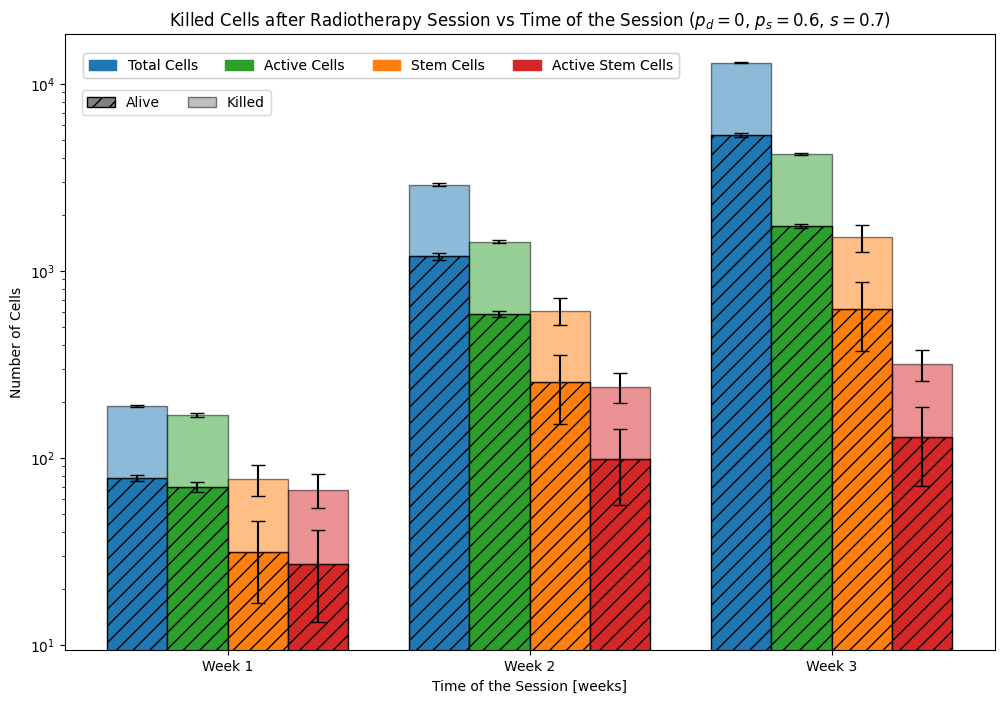

In [55]:
# Prepare the data for plotting
time_weeks = df_selected[("final_simulation_time", "")] / 7

# Extract means and standard deviations for each population
means = {
    "num_cells": df_selected[("num_cells", "mean")],
    "num_active": df_selected[("num_active", "mean")],
    "total_stem": df_selected[("total_stem", "mean")],
    "active_stem": df_selected[("active_stem", "mean")],
    "killed_cells": df_selected[("killed_cells", "mean")],
    "killed_active": df_selected[("killed_active", "mean")],
    "killed_stem": df_selected[("killed_stem", "mean")],
    "killed_active_stem": df_selected[("killed_active_stem", "mean")],
}

stds = {
    "num_cells": df_selected[("num_cells", "std")],
    "num_active": df_selected[("num_active", "std")],
    "total_stem": df_selected[("total_stem", "std")],
    "active_stem": df_selected[("active_stem", "std")],
    "killed_cells": df_selected[("killed_cells", "std")],
    "killed_active": df_selected[("killed_active", "std")],
    "killed_stem": df_selected[("killed_stem", "std")],
    "killed_active_stem": df_selected[("killed_active_stem", "std")],
}

# Calculate alive cells
alive = {
    "num_cells": means["num_cells"] - means["killed_cells"],
    "num_active": means["num_active"] - means["killed_active"],
    "total_stem": means["total_stem"] - means["killed_stem"],
    "active_stem": means["active_stem"] - means["killed_active_stem"],
}

# Set the positions and width for the bars
bar_width = 0.2
positions = np.arange(len(time_weeks))

# Get the default colors
default_colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot each bar with error bars for alive and killed cells
bars = ["num_cells", "num_active", "total_stem", "active_stem"]
colors = [
    default_colors[0],
    default_colors[2],
    default_colors[1],
    default_colors[3],
]
labels = ["Total Cells", "Active Cells", "Stem Cells", "Active Stem Cells"]

for i, bar in enumerate(bars):
    ax.bar(
        positions + (i - 1.5) * bar_width,
        alive[bar],
        bar_width,
        yerr=stds[bar],
        color=colors[i],
        hatch="//",
        edgecolor="black",
        capsize=5,
    )
    ax.bar(
        positions + (i - 1.5) * bar_width,
        means[bar],
        bar_width,
        bottom=alive[bar],
        yerr=stds[bar],
        color=colors[i],
        alpha=0.5,
        edgecolor="black",
        capsize=5,
    )

# Add labels and title
ax.set_xlabel("Time of the Session [weeks]")
ax.set_ylabel("Number of Cells")
ax.set_yscale("log")
ax.set_title(
    "Killed Cells after Radiotherapy Session vs Time of the Session ($p_d=0$, $p_s=0.6$, $s=0.7$)"
)
ax.set_xticks(positions)
ax.set_xticklabels(["Week 1", "Week 2", "Week 3"])

# Add legends
alive_patch = mpatches.Patch(
    facecolor="gray", edgecolor="black", hatch="//", label="Alive"
)
killed_patch = mpatches.Patch(
    facecolor="gray", edgecolor="black", alpha=0.5, label="Killed"
)

# Create a custom legend for 'alive' and 'killed'
legend1 = ax.legend(
    handles=[alive_patch, killed_patch],
    loc="upper center",
    bbox_to_anchor=(0.12, 0.92),
    ncol=2,
)
# Add the population legend
legend2 = ax.legend(
    handles=population_patches,
    labels=["Total Cells", "Active Cells", "Stem Cells", "Active Stem Cells"],
    loc="upper center",
    bbox_to_anchor=(0.34, 0.98),
    ncol=4,
)

# Add the legends to the plot
ax.add_artist(legend1)
ax.add_artist(legend2)

# Show the plot
plt.show()

# Let's save the plot as a PNG file
# fig.savefig('killed_cells_radiotherapy__pd=0__ps=0.6__s=0.7__.png', dpi=300)

# df_selected = df_flat.loc[
#     (df_flat["prob_diff"] == 0)
#     & (df_flat["prob_stem"] == 0.6)
#     & (df_flat["prob_supervivence_radiotherapy"] == 0.7)
#     # & (df_flat["final_simulation_time"] == 28)
# ]

## Loop

In [51]:
df_flat.prob_stem.unique()

array([0.2, 0.4, 0.6, 0.8])

In [52]:
df_flat.prob_supervivence_radiotherapy.unique()

array([0.3, 0.5, 0.7])

In [56]:
def make_single_plot(
    df_selected: pd.DataFrame,
    prob_stem: float,
    prob_supervivence_radiotherapy: float,
) -> None:
    # Prepare the data for plotting
    time_weeks = df_selected[("final_simulation_time", "")] / 7

    # Extract means and standard deviations for each population
    means = {
        "num_cells": df_selected[("num_cells", "mean")],
        "num_active": df_selected[("num_active", "mean")],
        "total_stem": df_selected[("total_stem", "mean")],
        "active_stem": df_selected[("active_stem", "mean")],
        "killed_cells": df_selected[("killed_cells", "mean")],
        "killed_active": df_selected[("killed_active", "mean")],
        "killed_stem": df_selected[("killed_stem", "mean")],
        "killed_active_stem": df_selected[("killed_active_stem", "mean")],
    }

    stds = {
        "num_cells": df_selected[("num_cells", "std")],
        "num_active": df_selected[("num_active", "std")],
        "total_stem": df_selected[("total_stem", "std")],
        "active_stem": df_selected[("active_stem", "std")],
        "killed_cells": df_selected[("killed_cells", "std")],
        "killed_active": df_selected[("killed_active", "std")],
        "killed_stem": df_selected[("killed_stem", "std")],
        "killed_active_stem": df_selected[("killed_active_stem", "std")],
    }

    # Calculate alive cells
    alive = {
        "num_cells": means["num_cells"] - means["killed_cells"],
        "num_active": means["num_active"] - means["killed_active"],
        "total_stem": means["total_stem"] - means["killed_stem"],
        "active_stem": means["active_stem"] - means["killed_active_stem"],
    }

    # Set the positions and width for the bars
    bar_width = 0.2
    positions = np.arange(len(time_weeks))

    # Get the default colors
    default_colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]

    # Create the plot
    fig, ax = plt.subplots(figsize=(12, 8))

    # Plot each bar with error bars for alive and killed cells
    bars = ["num_cells", "num_active", "total_stem", "active_stem"]
    colors = [
        default_colors[0],
        default_colors[2],
        default_colors[1],
        default_colors[3],
    ]
    labels = ["Total Cells", "Active Cells", "Stem Cells", "Active Stem Cells"]

    for i, bar in enumerate(bars):
        ax.bar(
            positions + (i - 1.5) * bar_width,
            alive[bar],
            bar_width,
            yerr=stds[bar],
            color=colors[i],
            hatch="//",
            edgecolor="black",
            capsize=5,
        )
        ax.bar(
            positions + (i - 1.5) * bar_width,
            means[bar],
            bar_width,
            bottom=alive[bar],
            yerr=stds[bar],
            color=colors[i],
            alpha=0.5,
            edgecolor="black",
            capsize=5,
        )

    # Add labels and title
    ax.set_xlabel("Time of the Session [weeks]")
    ax.set_ylabel("Number of Cells")
    ax.set_yscale("log")
    ax.set_title(
        f"Killed Cells after Radiotherapy Session vs Time of the Session ($p_d=0$, $p_s={prob_stem}$, $s={prob_supervivence_radiotherapy}$)"
    )
    ax.set_xticks(positions)
    ax.set_xticklabels(["Week 1", "Week 2", "Week 3"])

    # Add legends
    alive_patch = mpatches.Patch(
        facecolor="gray", edgecolor="black", hatch="//", label="Alive"
    )
    killed_patch = mpatches.Patch(
        facecolor="gray", edgecolor="black", alpha=0.5, label="Killed"
    )

    # Create a custom legend for 'alive' and 'killed'
    legend1 = ax.legend(
        handles=[alive_patch, killed_patch],
        loc="upper center",
        bbox_to_anchor=(0.12, 0.92),
        ncol=2,
    )
    # Add the population legend
    legend2 = ax.legend(
        handles=population_patches,
        labels=[
            "Total Cells",
            "Active Cells",
            "Stem Cells",
            "Active Stem Cells",
        ],
        loc="upper center",
        bbox_to_anchor=(0.34, 0.98),
        ncol=4,
    )

    # Add the legends to the plot
    ax.add_artist(legend1)
    ax.add_artist(legend2)

    # Show the plot
    # plt.show()

    # Let's save the plot as a PNG file
    fig.savefig(
        f"killed_cells_radiotherapy__pd=0__ps={prob_stem}__s={prob_supervivence_radiotherapy}__.png",
        dpi=300,
    )

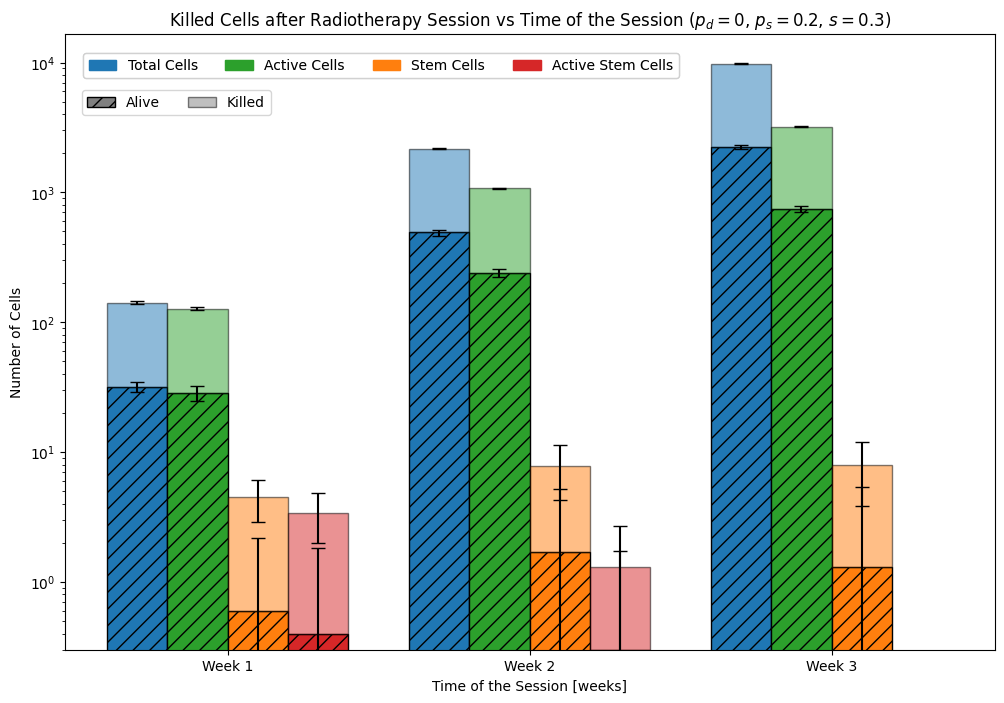

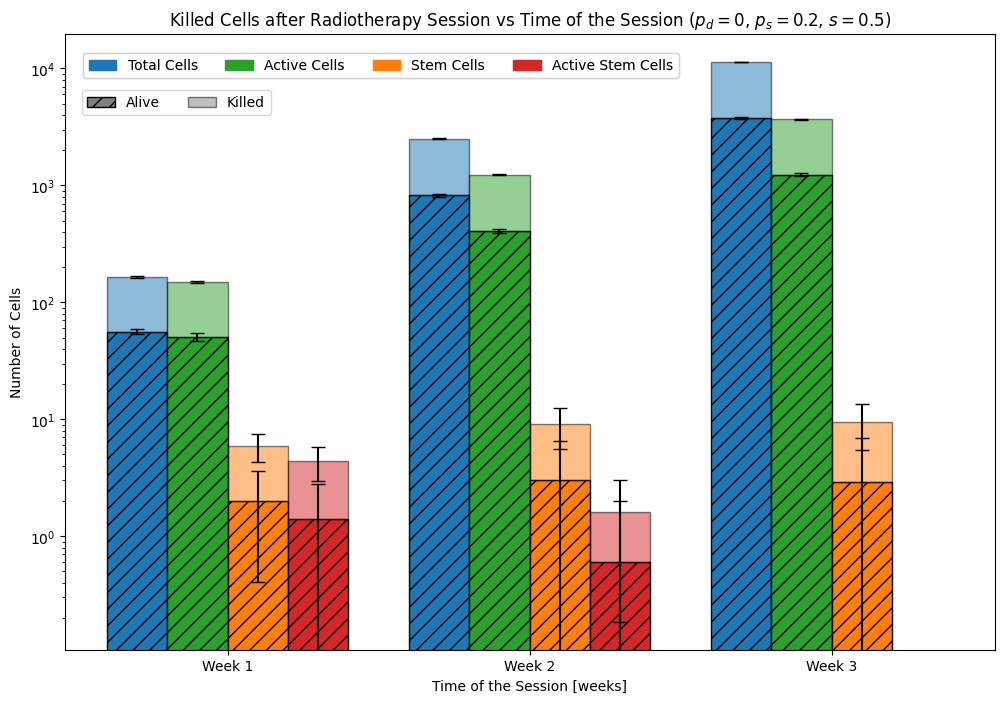

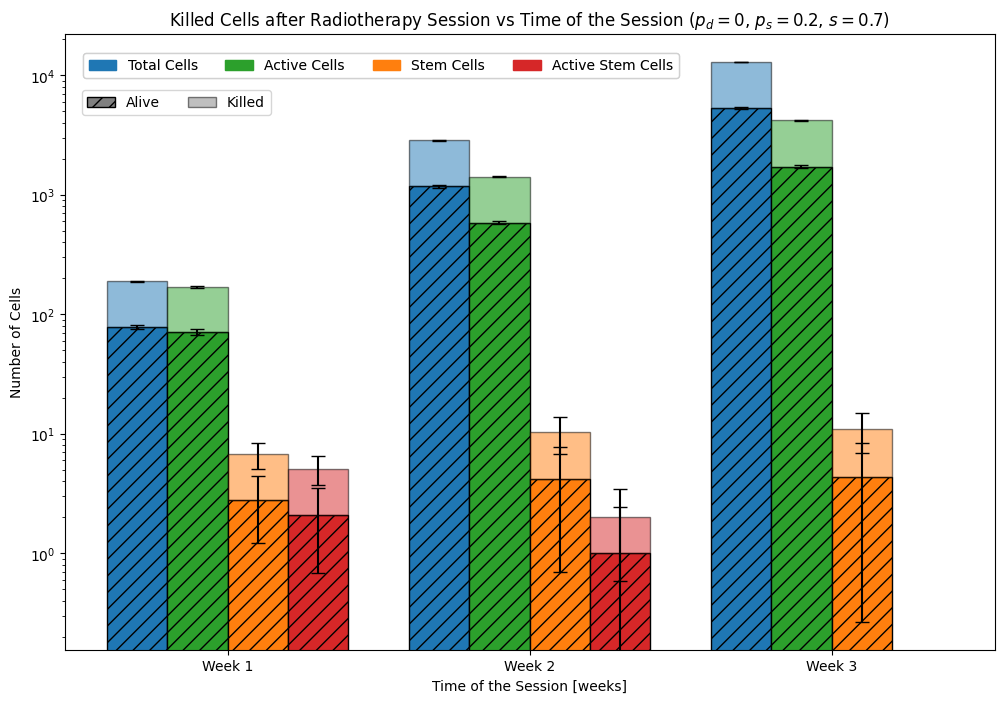

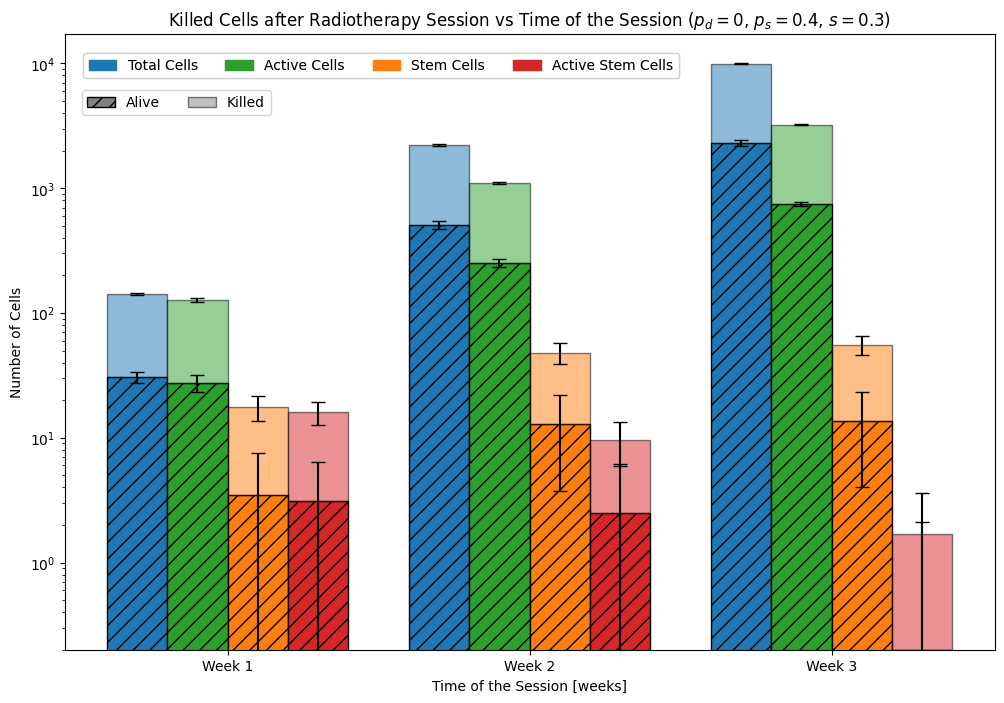

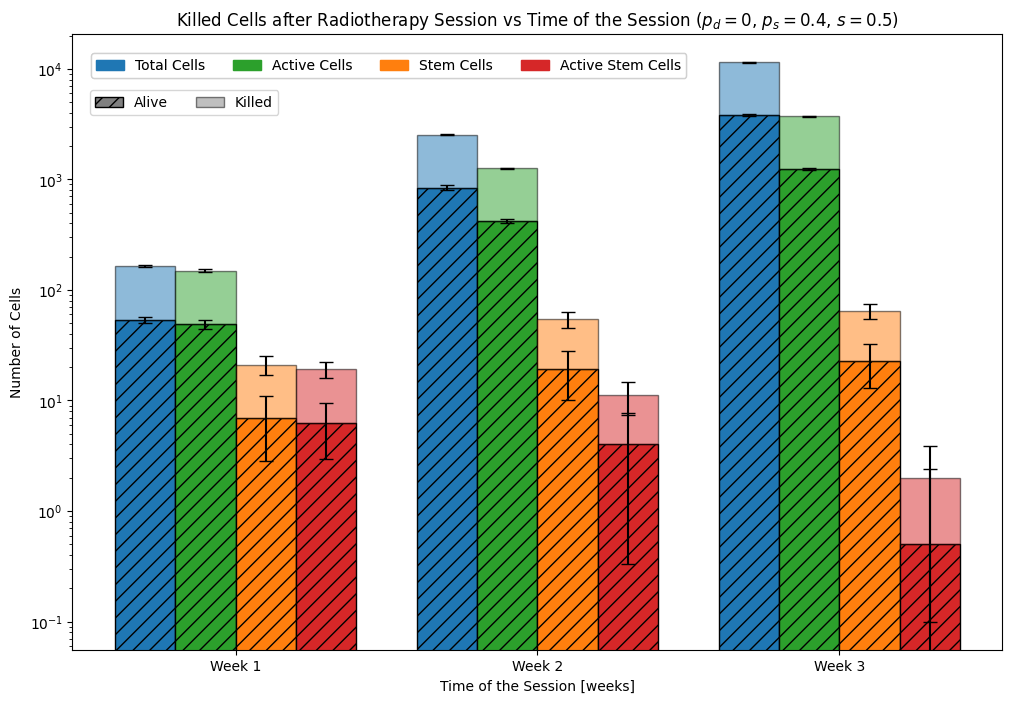

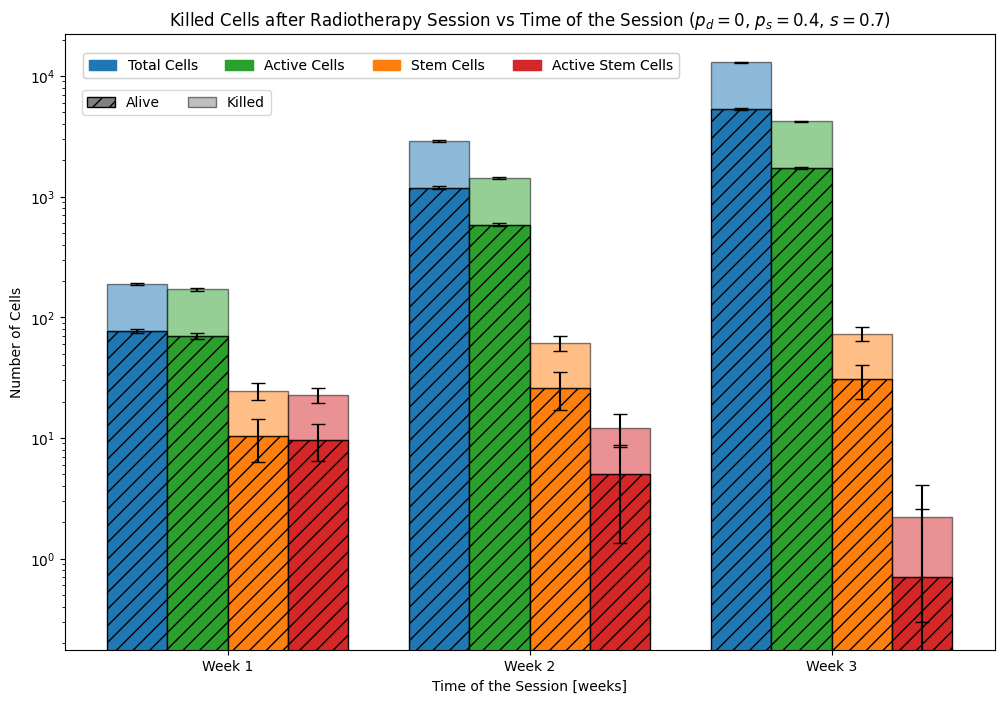

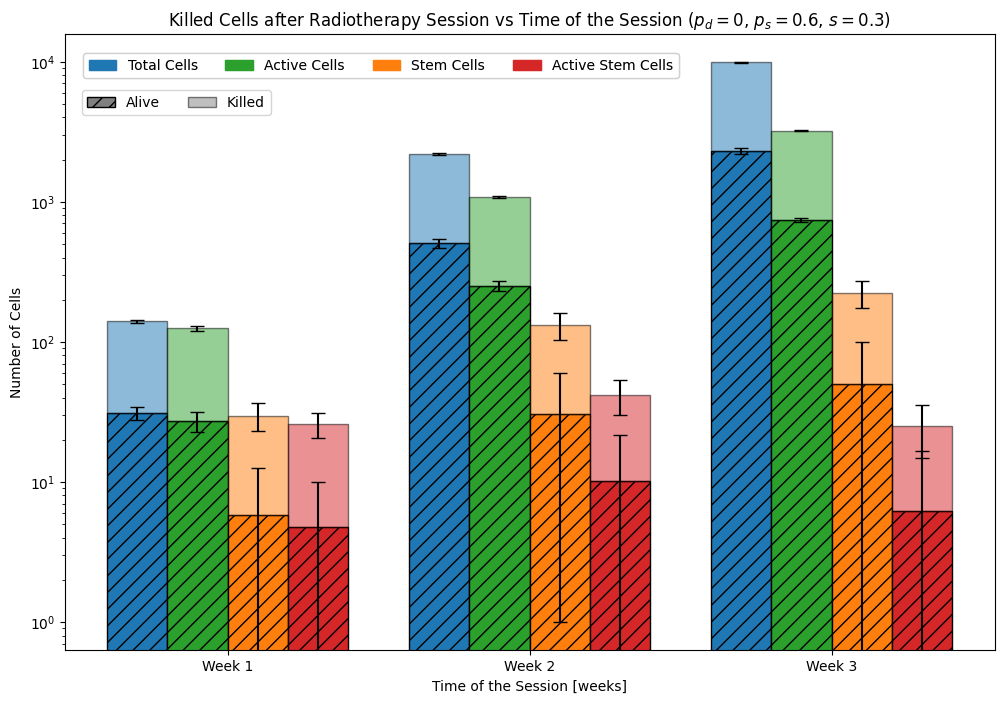

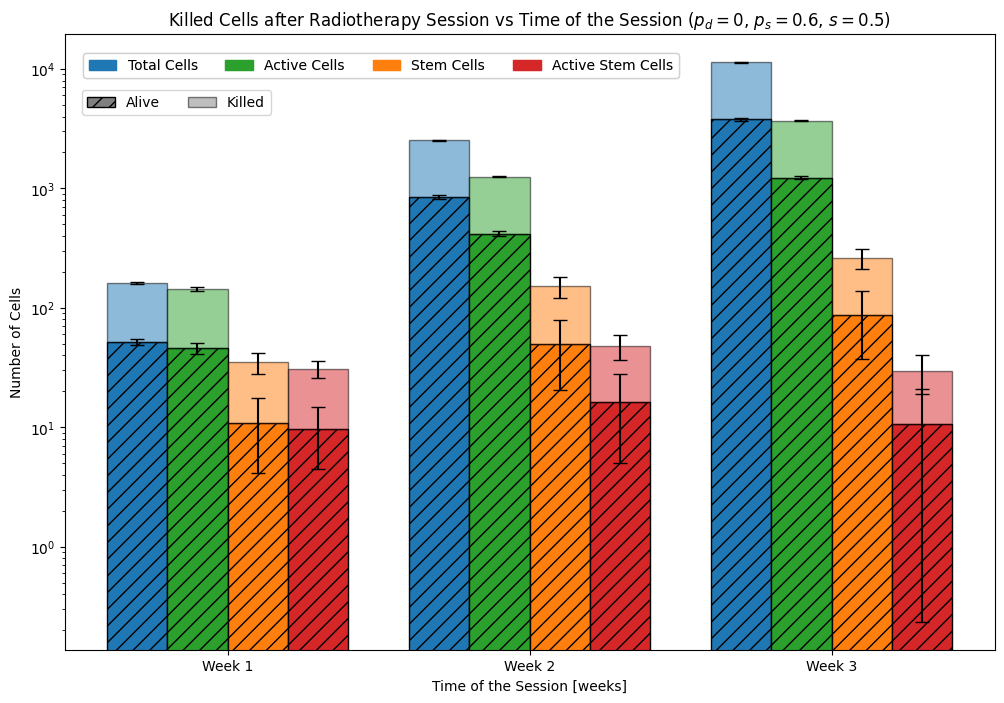

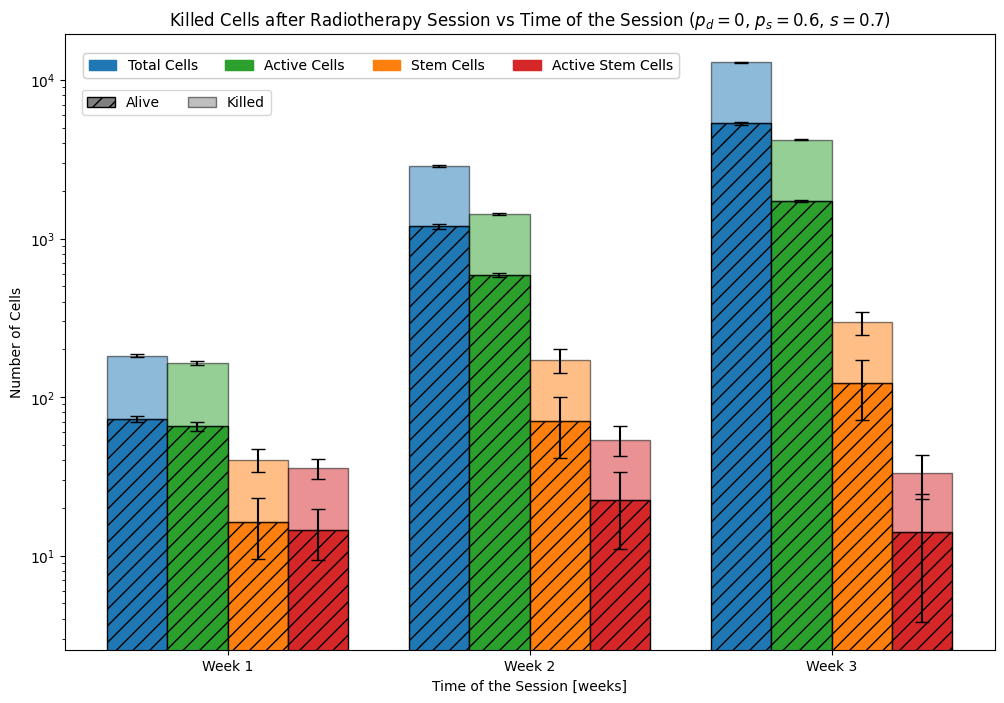

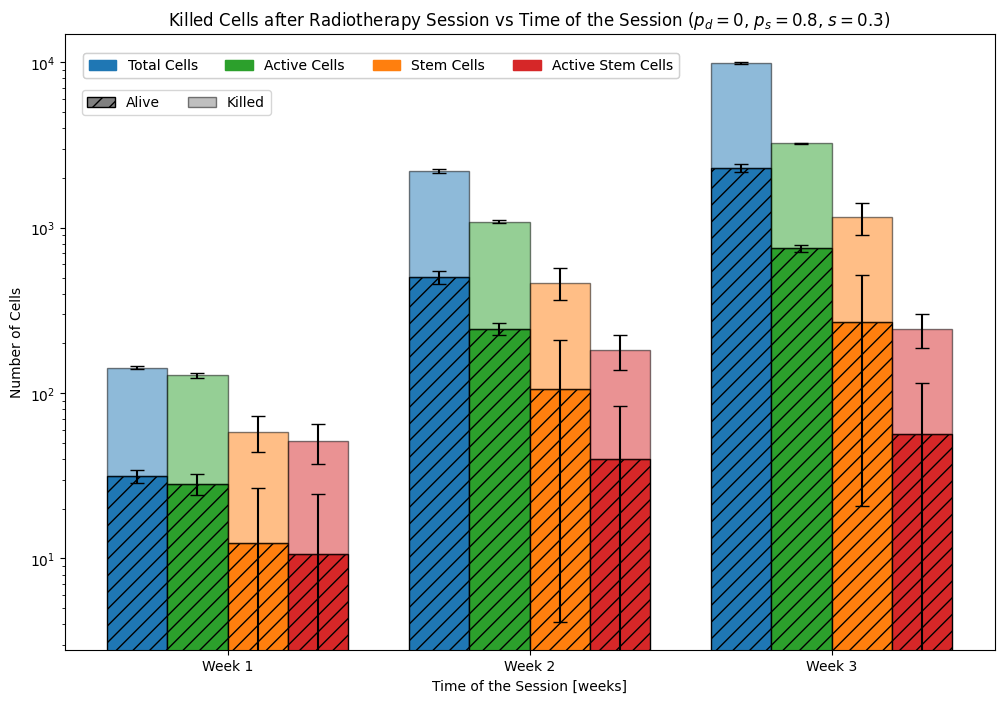

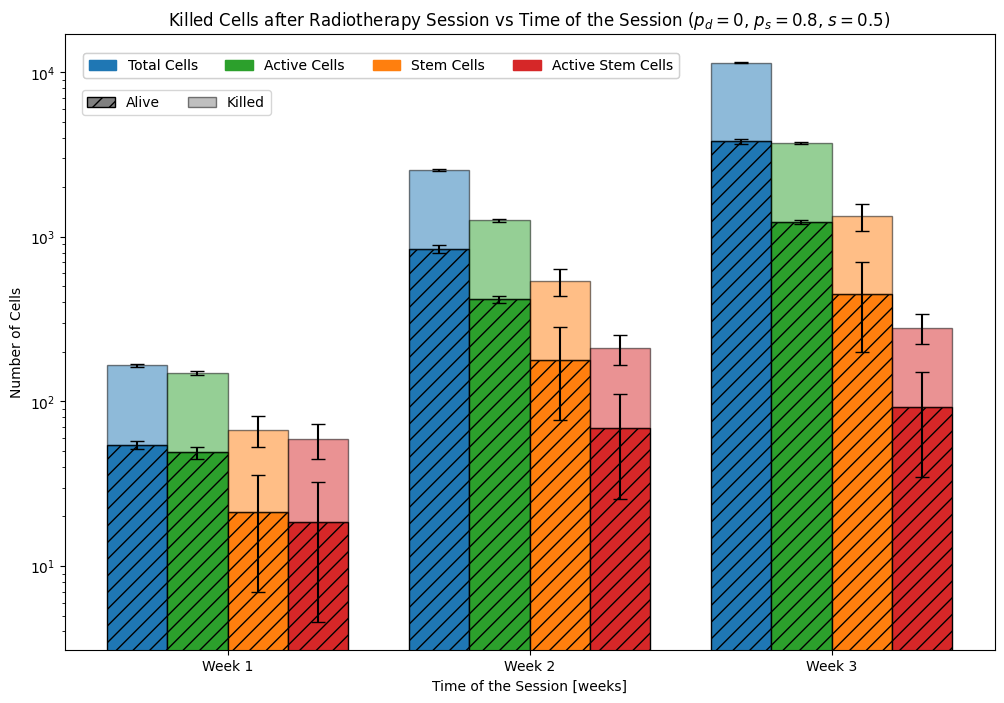

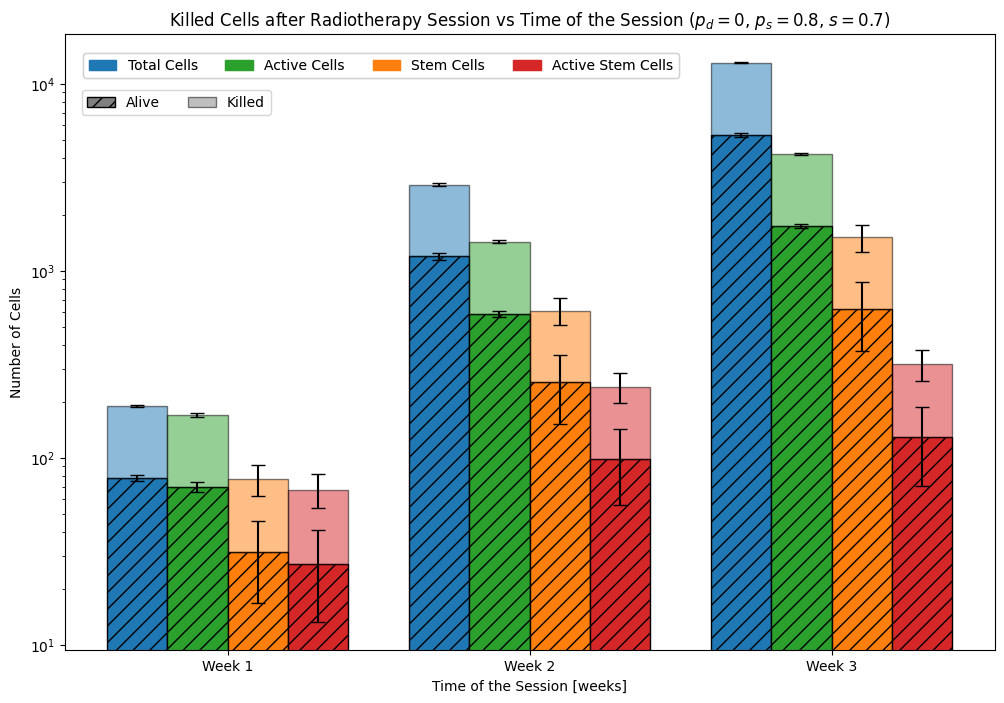

In [57]:
for ps in set(df_flat.prob_stem.unique()):
    for s in set(df_flat.prob_supervivence_radiotherapy.unique()):
        # Select the data
        df_selected = df_flat.loc[
            (df_flat["prob_diff"] == 0)
            & (df_flat["prob_stem"] == ps)
            & (df_flat["prob_supervivence_radiotherapy"] == s)
        ]

        # Call make graph
        make_single_plot(df_selected, ps, s)

## Composed Image

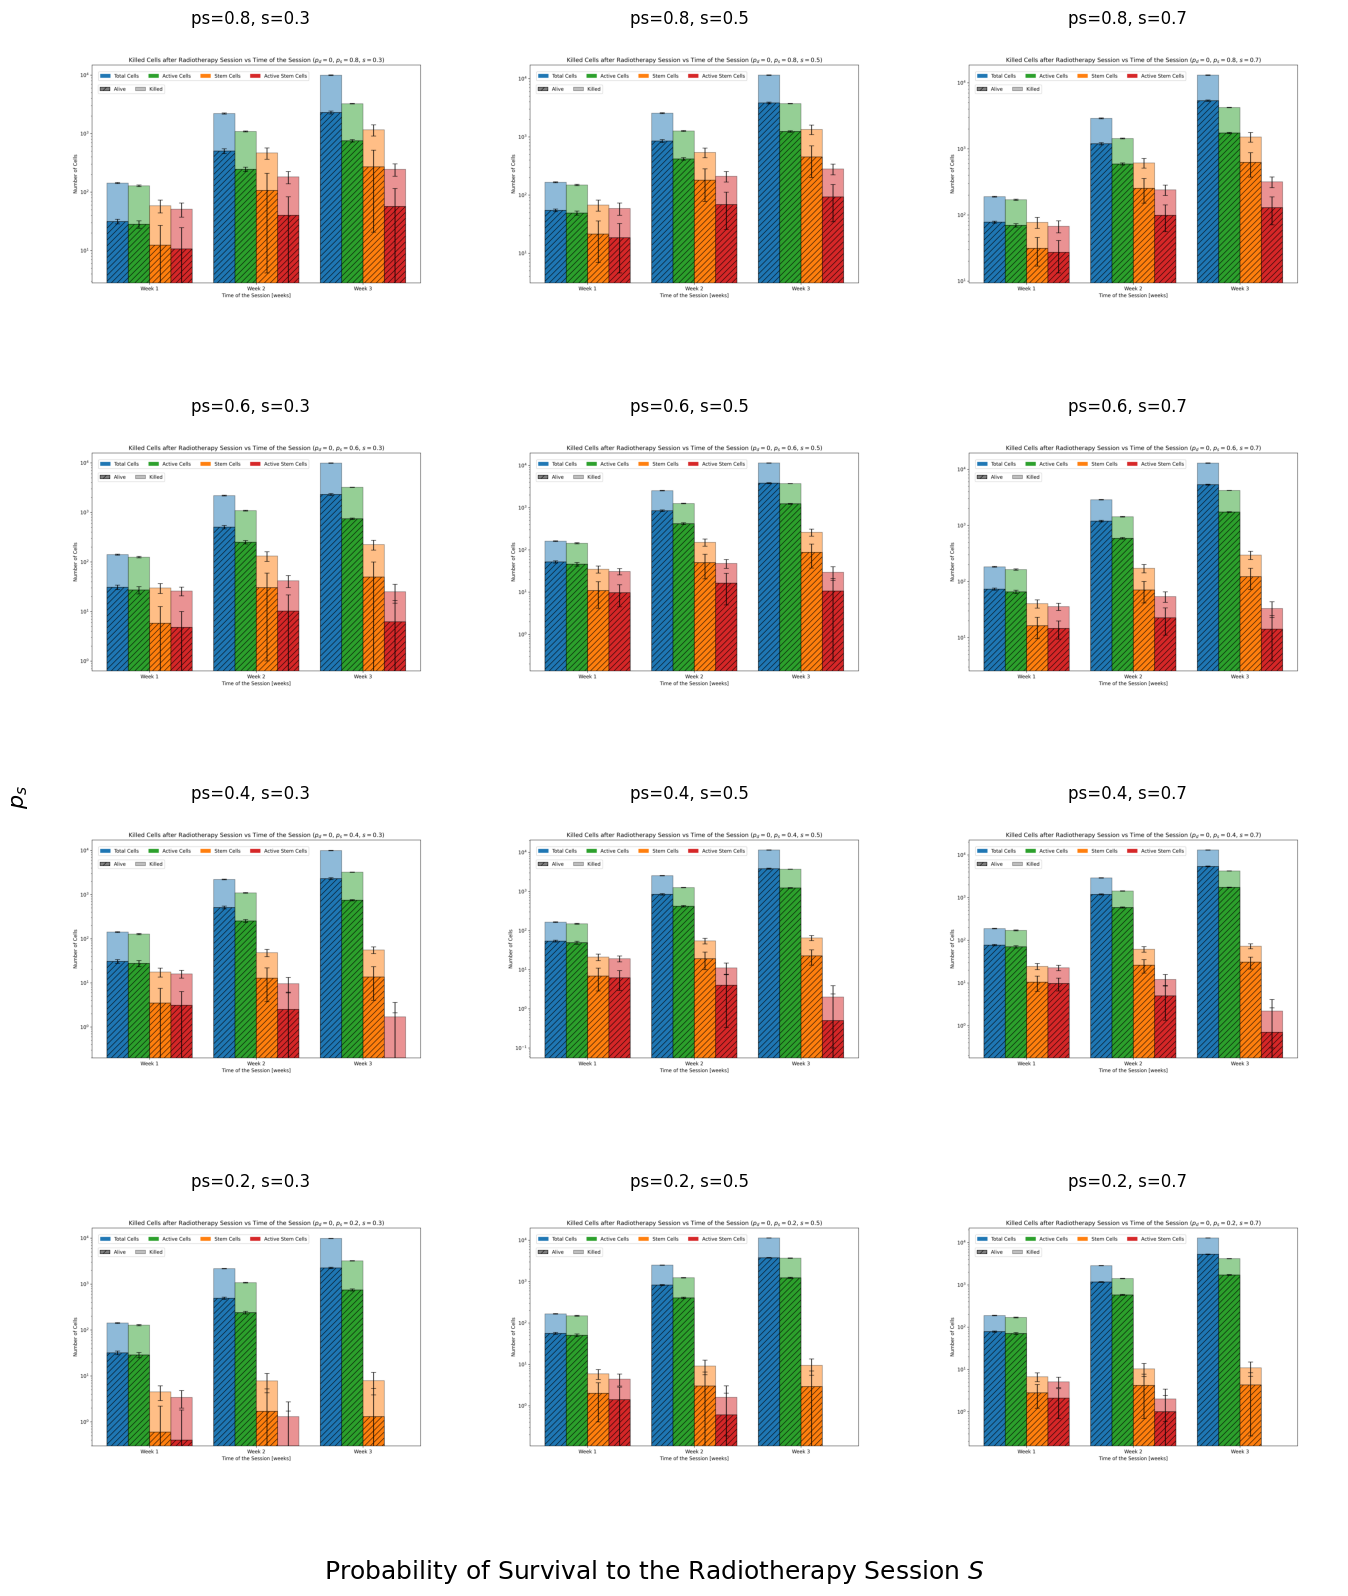

In [7]:
from matplotlib.image import imread
import os

# Define the unique values of prob_stem and prob_supervivence_radiotherapy
prob_stem_values = sorted(set(df_flat.prob_stem.unique()), reverse=True)
prob_supervivence_radiotherapy_values = sorted(
    set(df_flat.prob_supervivence_radiotherapy.unique())
)

# Create a figure with subplots arranged in a grid
fig, axs = plt.subplots(
    len(prob_stem_values),
    len(prob_supervivence_radiotherapy_values),
    figsize=(15, 18),
)

# Iterate over the values of prob_stem and prob_supervivence_radiotherapy to place each plot in the correct subplot
for i, ps in enumerate(prob_stem_values):
    for j, s in enumerate(prob_supervivence_radiotherapy_values):
        # Load the corresponding image
        filename = f"killed_cells_radiotherapy__pd=0__ps={ps}__s={s}__.png"
        img = imread(filename)

        # Display the image in the corresponding subplot
        ax = axs[i, j]
        ax.imshow(img)
        ax.axis("off")
        ax.set_title(f"ps={ps}, s={s}")

# Add labels for the outer axes
fig.text(
    0.5,
    0.04,
    "Probability of Survival to the Radiotherapy Session $S$",
    ha="center",
    fontsize=18,
)
fig.text(0.04, 0.5, "$p_s$", va="center", rotation="vertical", fontsize=16)

# Adjust layout
plt.tight_layout(rect=[0.05, 0.05, 1, 1])

# Show the combined plot
plt.show()

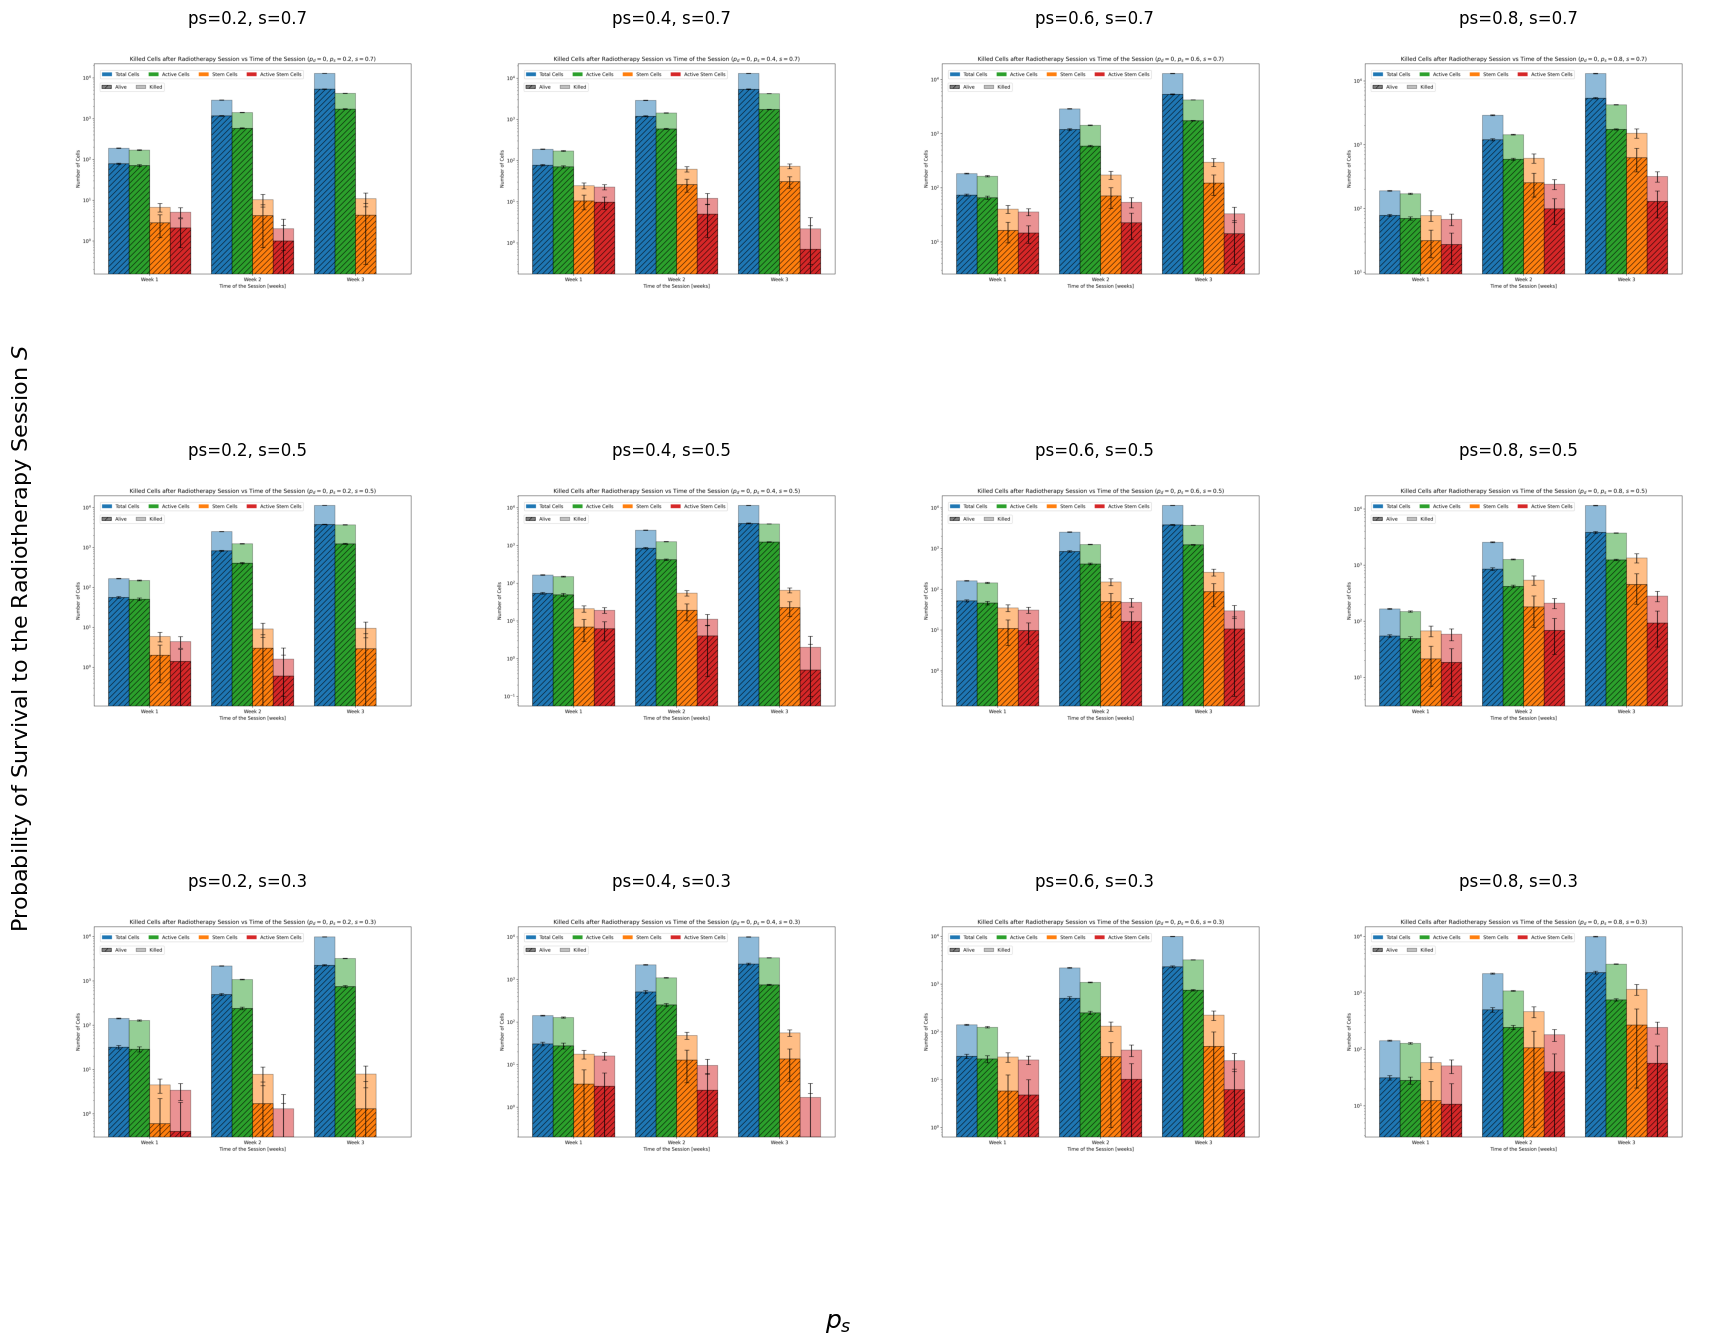

In [10]:
from matplotlib.image import imread
import os

# Define the unique values of prob_stem and prob_supervivence_radiotherapy
prob_stem_values = sorted(set(df_flat.prob_stem.unique()), reverse=False)
prob_supervivence_radiotherapy_values = sorted(
    set(df_flat.prob_supervivence_radiotherapy.unique()), reverse=True
)

# Create a figure with subplots arranged in a grid
fig, axs = plt.subplots(
    len(prob_supervivence_radiotherapy_values),
    len(prob_stem_values),
    figsize=(18, 15),
    squeeze=True,
)

# Iterate over the values of prob_stem and prob_supervivence_radiotherapy to place each plot in the correct subplot
for i, ps in enumerate(prob_stem_values):
    for j, s in enumerate(prob_supervivence_radiotherapy_values):
        # Load the corresponding image
        filename = f"killed_cells_radiotherapy__pd=0__ps={ps}__s={s}__.png"
        img = imread(filename)

        # Display the image in the corresponding subplot
        ax = axs[j, i]
        ax.imshow(img)
        ax.axis("off")
        ax.set_title(f"ps={ps}, s={s}")

# Add labels for the outer axes
fig.text(0.5, 0.04, "$p_s$", ha="center", fontsize=18)
fig.text(
    0.04,
    0.5,
    "Probability of Survival to the Radiotherapy Session $S$",
    va="center",
    rotation="vertical",
    fontsize=16,
)

# Adjust layout
plt.tight_layout(rect=[0.05, 0.05, 1, 1])

# Show the combined plot
plt.show()

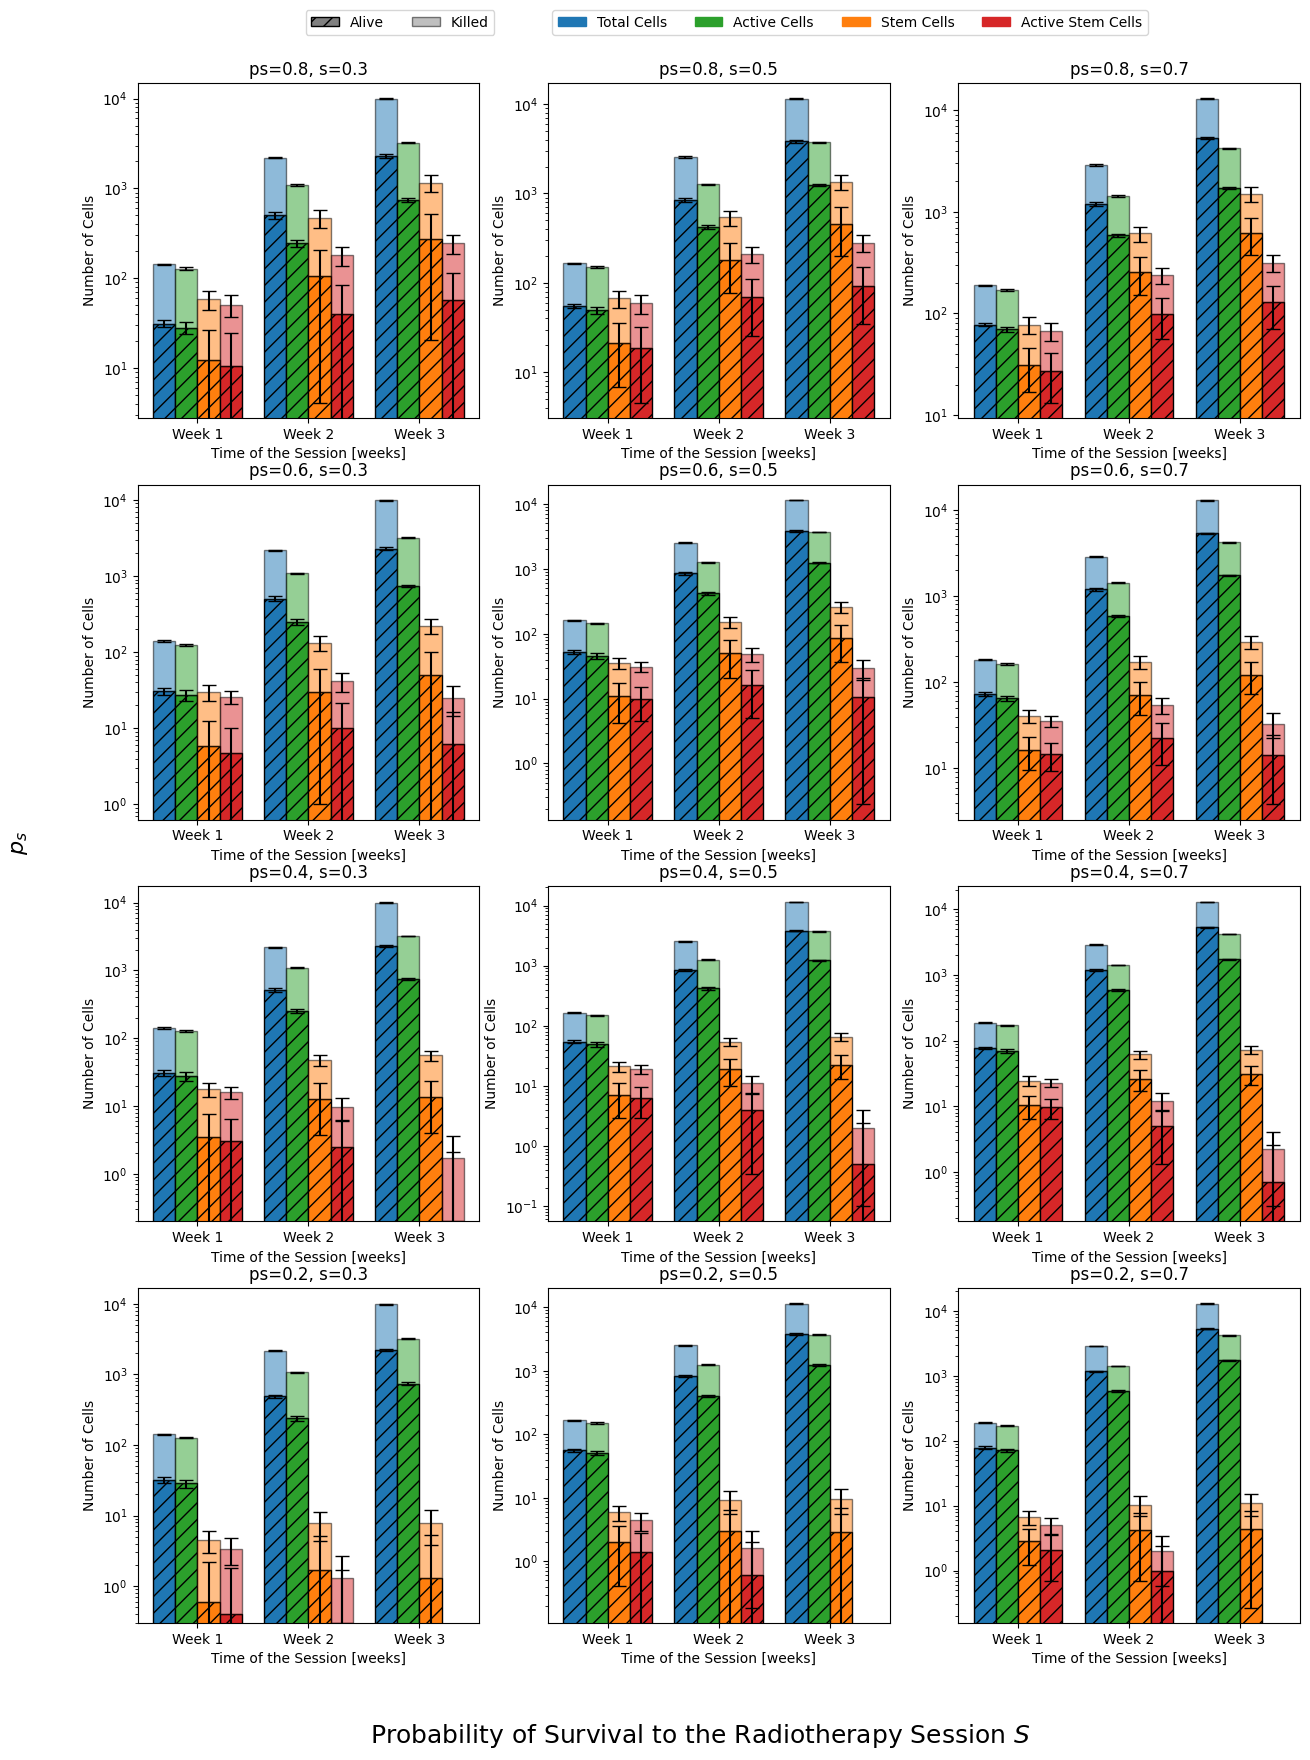

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.patches as mpatches


# Define the plotting function
def make_single_plot(
    ax, df_selected, prob_stem, prob_supervivence_radiotherapy
):
    # Prepare the data for plotting
    time_weeks = df_selected[("final_simulation_time", "")] / 7

    # Extract means and standard deviations for each population
    means = {
        "num_cells": df_selected[("num_cells", "mean")],
        "num_active": df_selected[("num_active", "mean")],
        "total_stem": df_selected[("total_stem", "mean")],
        "active_stem": df_selected[("active_stem", "mean")],
        "killed_cells": df_selected[("killed_cells", "mean")],
        "killed_active": df_selected[("killed_active", "mean")],
        "killed_stem": df_selected[("killed_stem", "mean")],
        "killed_active_stem": df_selected[("killed_active_stem", "mean")],
    }

    stds = {
        "num_cells": df_selected[("num_cells", "std")],
        "num_active": df_selected[("num_active", "std")],
        "total_stem": df_selected[("total_stem", "std")],
        "active_stem": df_selected[("active_stem", "std")],
        "killed_cells": df_selected[("killed_cells", "std")],
        "killed_active": df_selected[("killed_active", "std")],
        "killed_stem": df_selected[("killed_stem", "std")],
        "killed_active_stem": df_selected[("killed_active_stem", "std")],
    }

    # Calculate alive cells
    alive = {
        "num_cells": means["num_cells"] - means["killed_cells"],
        "num_active": means["num_active"] - means["killed_active"],
        "total_stem": means["total_stem"] - means["killed_stem"],
        "active_stem": means["active_stem"] - means["killed_active_stem"],
    }

    # Set the positions and width for the bars
    bar_width = 0.2
    positions = np.arange(len(time_weeks))

    # Get the default colors
    default_colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]

    # Plot each bar with error bars for alive and killed cells
    bars = ["num_cells", "num_active", "total_stem", "active_stem"]
    colors = [
        default_colors[0],
        default_colors[2],
        default_colors[1],
        default_colors[3],
    ]
    labels = ["Total Cells", "Active Cells", "Stem Cells", "Active Stem Cells"]

    for i, bar in enumerate(bars):
        ax.bar(
            positions + (i - 1.5) * bar_width,
            alive[bar],
            bar_width,
            yerr=stds[bar],
            color=colors[i],
            hatch="//",
            edgecolor="black",
            capsize=5,
        )
        ax.bar(
            positions + (i - 1.5) * bar_width,
            means[bar],
            bar_width,
            bottom=alive[bar],
            yerr=stds[bar],
            color=colors[i],
            alpha=0.5,
            edgecolor="black",
            capsize=5,
        )

    # Add labels and title
    ax.set_xlabel("Time of the Session [weeks]")
    ax.set_ylabel("Number of Cells")
    ax.set_yscale("log")
    ax.set_title(f"ps={prob_stem}, s={prob_supervivence_radiotherapy}")
    ax.set_xticks(positions)
    ax.set_xticklabels(["Week 1", "Week 2", "Week 3"])


# Define the unique values of prob_stem and prob_supervivence_radiotherapy
prob_stem_values = sorted(set(df_flat.prob_stem.unique()), reverse=True)
prob_supervivence_radiotherapy_values = sorted(
    set(df_flat.prob_supervivence_radiotherapy.unique())
)

# Create a figure with subplots arranged in a grid
fig, axs = plt.subplots(
    len(prob_stem_values),
    len(prob_supervivence_radiotherapy_values),
    figsize=(15, 20),
)

# Iterate over the values of prob_stem and prob_supervivence_radiotherapy to place each plot in the correct subplot
for i, ps in enumerate(prob_stem_values):
    for j, s in enumerate(prob_supervivence_radiotherapy_values):
        # Select the data
        df_selected = df_flat.loc[
            (df_flat["prob_diff"] == 0)
            & (df_flat["prob_stem"] == ps)
            & (df_flat["prob_supervivence_radiotherapy"] == s)
        ]

        # Make the plot
        make_single_plot(axs[i, j], df_selected, ps, s)

# Add labels for the outer axes
fig.text(
    0.5,
    0.05,
    "Probability of Survival to the Radiotherapy Session $S$",
    ha="center",
    fontsize=18,
)
fig.text(0.04, 0.5, "$p_s$", va="center", rotation="vertical", fontsize=16)

# Create and add legends
alive_patch = mpatches.Patch(
    facecolor="gray", edgecolor="black", hatch="//", label="Alive"
)
killed_patch = mpatches.Patch(
    facecolor="gray", edgecolor="black", alpha=0.5, label="Killed"
)
legend1 = fig.legend(
    handles=[alive_patch, killed_patch],
    loc="upper center",
    bbox_to_anchor=(0.3, 0.92),
    ncol=2,
)

population_patches = [
    mpatches.Patch(color=color)
    for color in [
        default_colors[0],
        default_colors[2],
        default_colors[1],
        default_colors[3],
    ]
]
legend2 = fig.legend(
    handles=population_patches,
    labels=["Total Cells", "Active Cells", "Stem Cells", "Active Stem Cells"],
    loc="upper center",
    bbox_to_anchor=(0.6, 0.92),
    ncol=4,
)

# Adjust layout
# plt.tight_layout(pad=5, h_pad=3)

# Show the combined plot
plt.show()